In [13]:
from sensingpy import reader, plot
from physics_informed_ml_odw import predict_2d, load_model

In [14]:
image = reader.open(r'../data/formosa_2018.tif') 

image['ODW_ML'] = predict_2d(image, 'ML')
image['ODW_CS_ML'] = predict_2d(image, 'CS_ML')

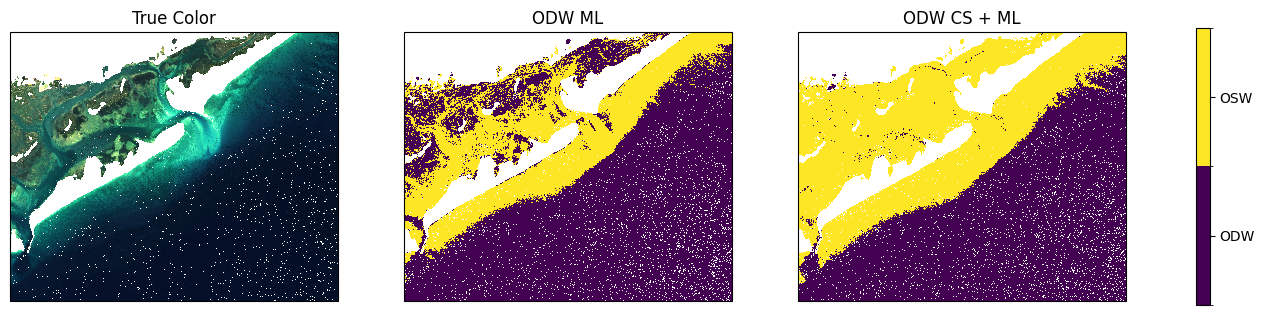

In [15]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.cm import ScalarMappable

fig, axs = plot.get_geofigure(image.crs, 1, 3, figsize = (6 * 3, 6))

plot.plot_rgb(image, 'Rrs_B4', 'Rrs_B3', 'Rrs_B2', axs[0], brightness = 30)
plot.plot_band(image, 'ODW_ML', axs[1])
plot.plot_band(image, 'ODW_CS_ML', axs[2])

axs[0].set_title('True Color')
axs[1].set_title('ODW ML')
axs[2].set_title('ODW CS + ML')

# Add single discrete colorbar on the right
cmap = ListedColormap(['#440154', '#fde725'])  # viridis endpoints
bounds = [0, 0.5, 1]
norm = BoundaryNorm(bounds, cmap.N)
sm = ScalarMappable(cmap=cmap, norm=norm)

cbar = fig.colorbar(sm, ax=axs.tolist(), ticks=[0.25, 0.75], location='right', shrink=0.6)
cbar.ax.set_yticklabels(['ODW', 'OSW'])

# Save figure to docs/assets
fig.savefig('../docs/assets/odw_comparison.png', dpi=150, bbox_inches='tight')